In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [10]:
data = pd.read_csv('Data.csv')

angle = np.array(data['1-cos'])
N = np.array(data['N'])
data

,1-cos,N
0,0.000000,0.001163
1,0.015192,0.001122
2,0.060307,0.001192
3,0.133975,0.001287
4,0.233956,0.001479
5,0.357212,0.001645
6,0.500000,0.001883
7,0.657980,0.002045
8,0.826352,0.002257
9,1.000000,0.002475


a =  0.0013881171092511324
b =  0.0011341862672928434
sigma_a =  2.5086068553463226e-05
sigma_b =  1.9677182622915747e-05
S_e =  4.203124330638933e-05
Relative S_r a = %  1.8072011638122354
Relative S_r b = %  1.734916317571244


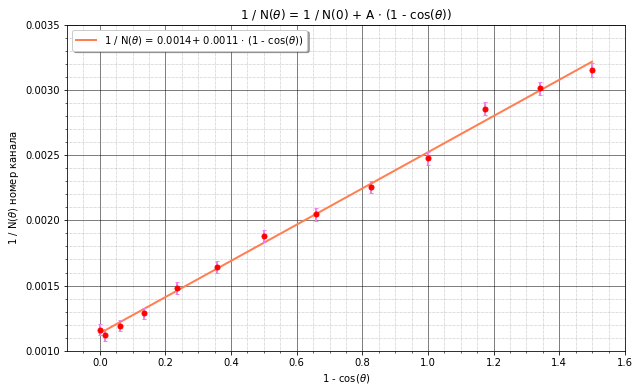

In [35]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, angle, N)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = N - approx(angle,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(angle))
print('S_e = ', S_e)
Stand_error = np.sqrt((N * 0.01)**2 + S_e**2)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(angle, approx(angle, *beta_opt1), 'coral', lw = 2)

lgnd = ax.legend([r'1 / N($\theta$) = %.4f+ %.4f $\cdot$ (1 - $\cos(\theta)$)' %(a,b)], loc='upper left', shadow=True)

ax.set_title(r'1 / N($\theta$) = 1 / N(0) + A $\cdot$ (1 - $\cos(\theta)$)')
ax.set_ylabel(r'1 / N($\theta$) номер канала')
ax.set_xlabel(r'1 - $\cos(\theta)$')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(angle, N, fmt = 'ro', markersize = '5', yerr = Stand_error, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')


plt.xlim (-0.1, 1.6)
plt.ylim (0.001, 0.0035)
plt.savefig('plot.png', dpi=400, quality=100)
plt.show()

In [26]:
print('N(90) = ',1 /approx(1, *beta_opt1))

N(90) =  396.4630144412627


In [27]:
print('N(0) = ',1 / b)

N(0) =  881.689391626008


In [43]:
Stand_error = np.sqrt((N * 0.01)**2 + S_e**2)
error90 = Stand_error[10] / approx(1, *beta_opt1)
error90 * 100

2.0149340772236273

In [45]:
error0 = Stand_error[0] / b
error0 * 100

3.8450489881169716

In [46]:
error = np.sqrt((error90 * 100)**2 + (error0 * 100)**2)
error

4.341009220973433